In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Gradient Descent Visualization

We can think of a function of two or more variables. We have a convex (one global minimum, no local minima) objective function (loss function), e.g. $$\large L(\beta_1, \beta_2)$$ which we try to minimize. In the case that there is no convex Loss function, the challenge is to fin the lowest local minimum (much harder problem).

We hope to share some ideas when $$\large L(\vec{\beta})$$ is convex in th evector $\vec{\beta}$. In particular, we are interested in the situation where $L$ is the sum of squared errors, such as: 
$$\large L(\vec{\beta}): = \displaystyle\sum_{i=1}^{n} (y_i-x_i\cdot \vec{\beta})^2$$
Notice that this yields quadratics in the components of beta, which means this is a convex loss function (high dimensional parabola)

To reduce this problem to a one dimensional problem, we think of perturbing an ideal $\vec{\beta}$. We want to know how to update $\vec{\beta}$ so that we make the best progress in minimizing $L$. Think of updating $\vec{\beta}$ by going $t$ units in a direction $\vec{v}$. So we ask, what is the vector $\vec{v}$ that gives the best progress?

We consider some $$g(t) :=L(\vec{\beta} + t \cdot \vec{v})$$
Notice that, from the chain rule, the derivative of $g(t)$ is $$\large g'(t) = \nabla L \cdot \vec{v}$$ so for the most effective step of sie $t$, we want the direction vector $$\large \vec{v} = - \nabla L$$

A little wisdom:
<font color='red' size=5pt> This works well if $L$ is convex in $\vec{\beta}$ and the only issue would be when ther eis a very shallow basin of the minimum for $L$.

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

## An Example for Contour Plots

In [9]:
x1 = np.linspace(-10.0, 10.0, 101)
x2 = np.linspace(-10.0, 10.0, 101)
x2

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [11]:
X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(X1**2/9 + X2**2/4)

Here we have the function:

$$F(x_1,x_2):=\sqrt{\frac{x_1^2}{9}+\frac{x_2^2}{4}}$$

What shape is implied by the equation

$$\frac{x_1^2}{9}+\frac{x_2^2}{4}=k$$

In [12]:
X1

array([[-10. ,  -9.8,  -9.6, ...,   9.6,   9.8,  10. ],
       [-10. ,  -9.8,  -9.6, ...,   9.6,   9.8,  10. ],
       [-10. ,  -9.8,  -9.6, ...,   9.6,   9.8,  10. ],
       ...,
       [-10. ,  -9.8,  -9.6, ...,   9.6,   9.8,  10. ],
       [-10. ,  -9.8,  -9.6, ...,   9.6,   9.8,  10. ],
       [-10. ,  -9.8,  -9.6, ...,   9.6,   9.8,  10. ]])

Here the function is $$f(x_1,x_2):=\sqrt{\frac{(x_1)^2}{9}+\frac{(x_2)^2}{4}}$$

The level curve is the geometric locus of points $(x_1,x_2)$ such that 

$$f(x_1,x_2)=l$$

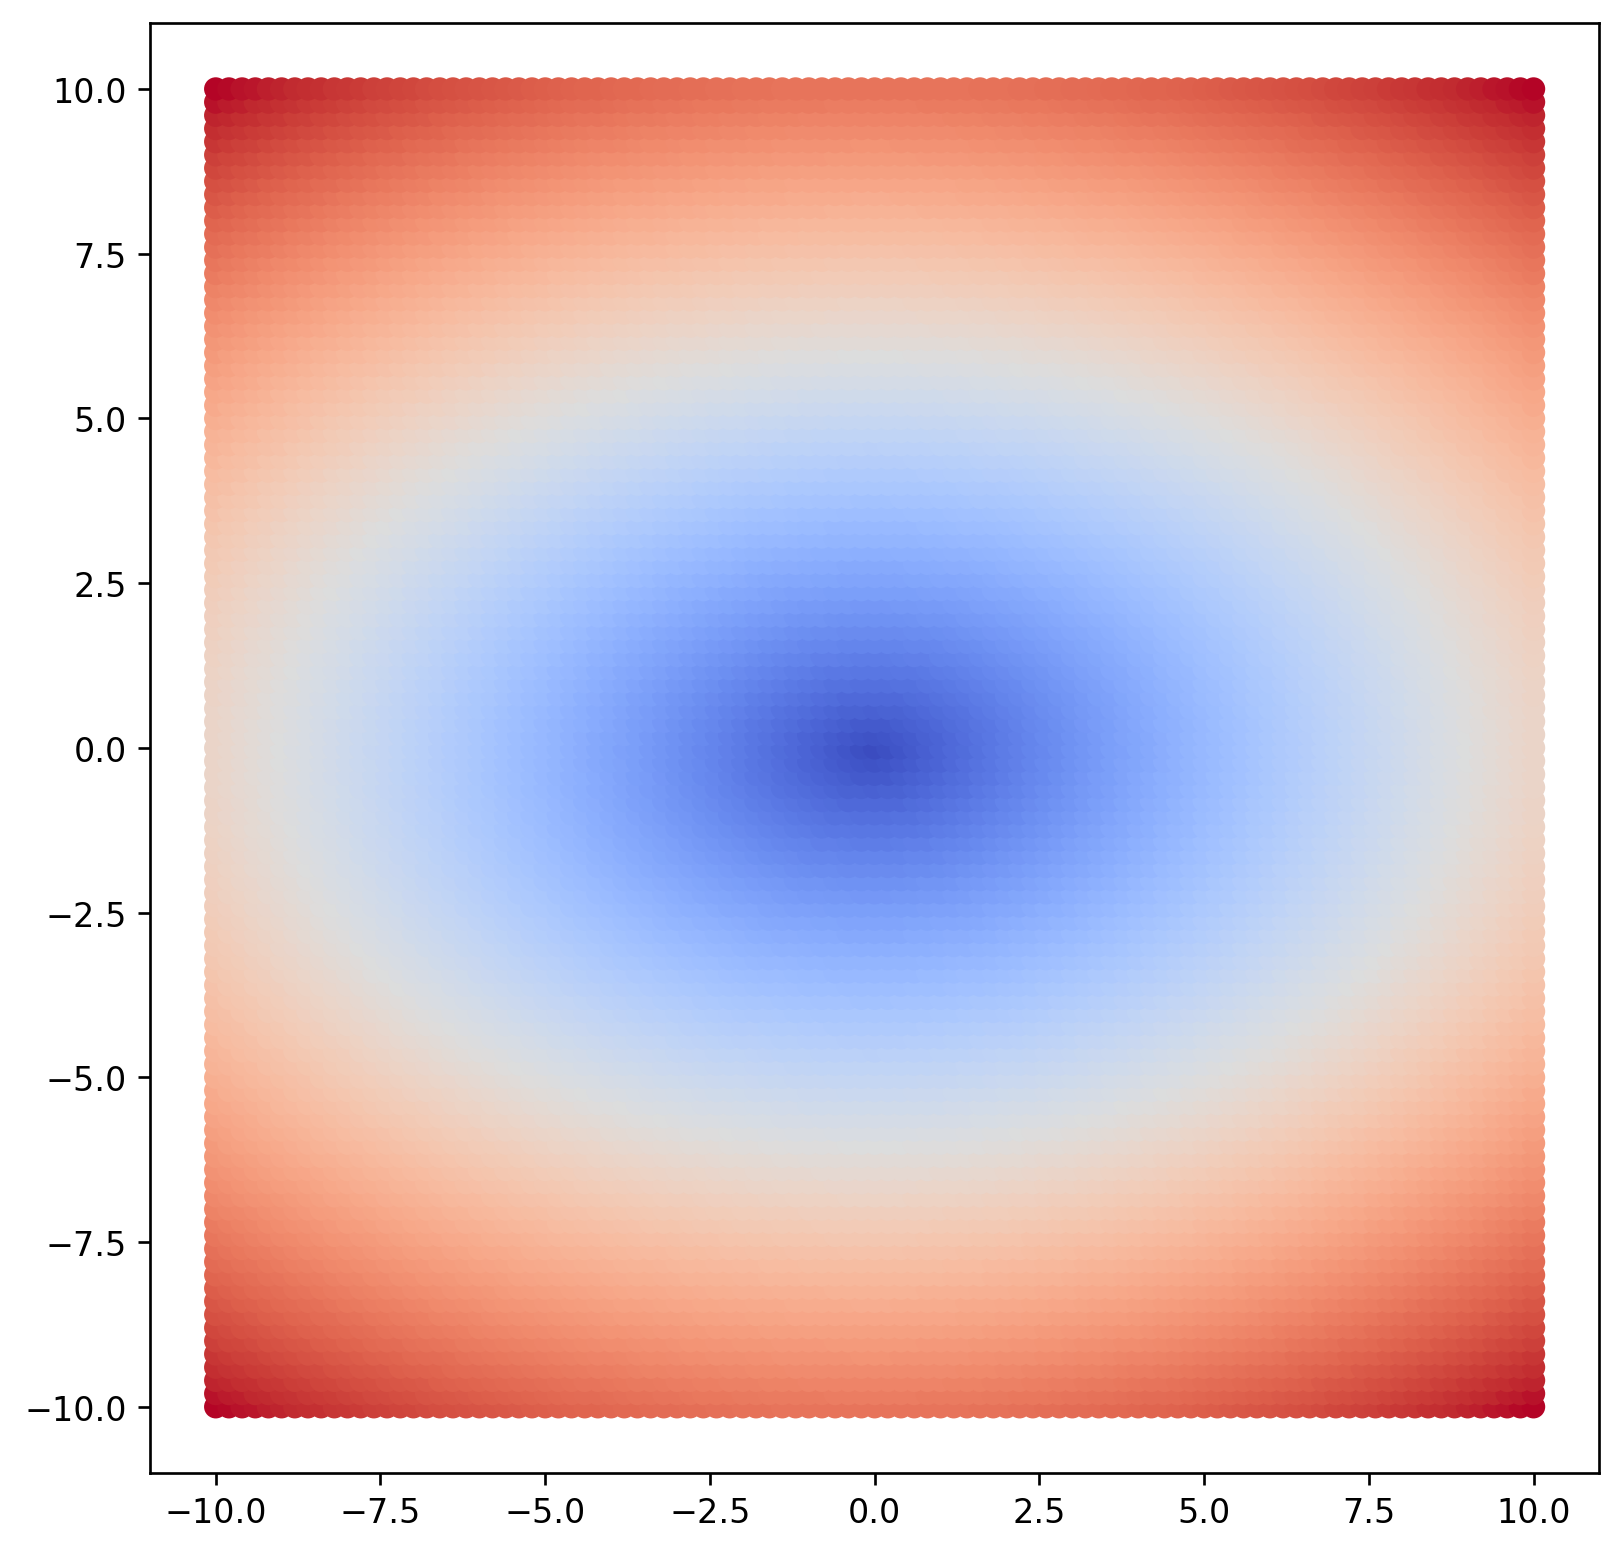

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cm = plt.cm.get_cmap('coolwarm')
plt.scatter(X1, X2, c=Y, cmap=cm)
plt.show()

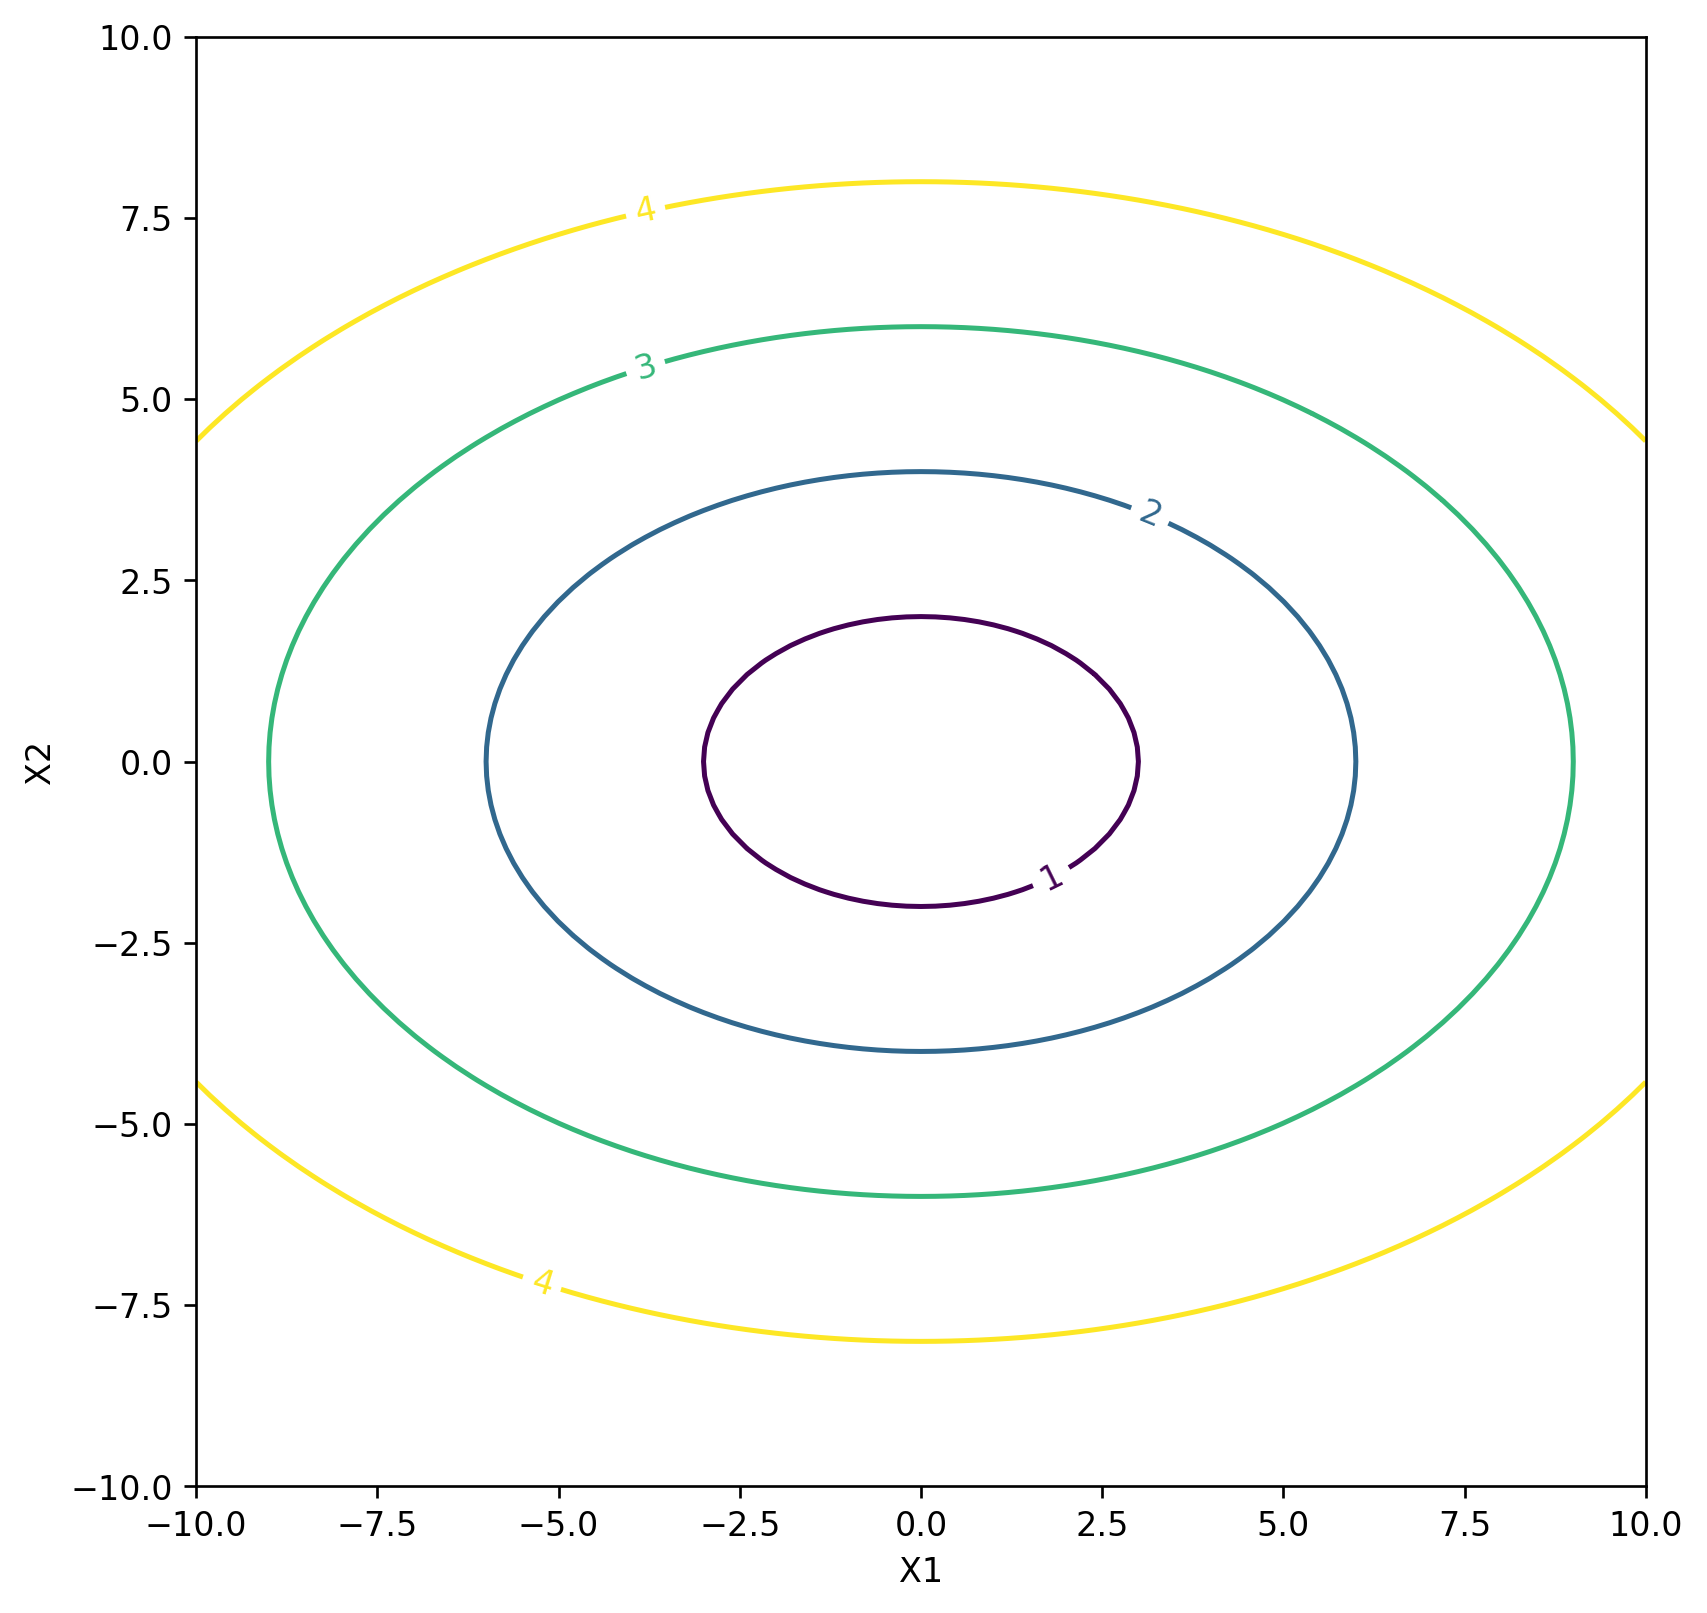

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
levels = [1,2,3,4]
cp = plt.contour(X1, X2, Y,levels) # here we show some of the level curves
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

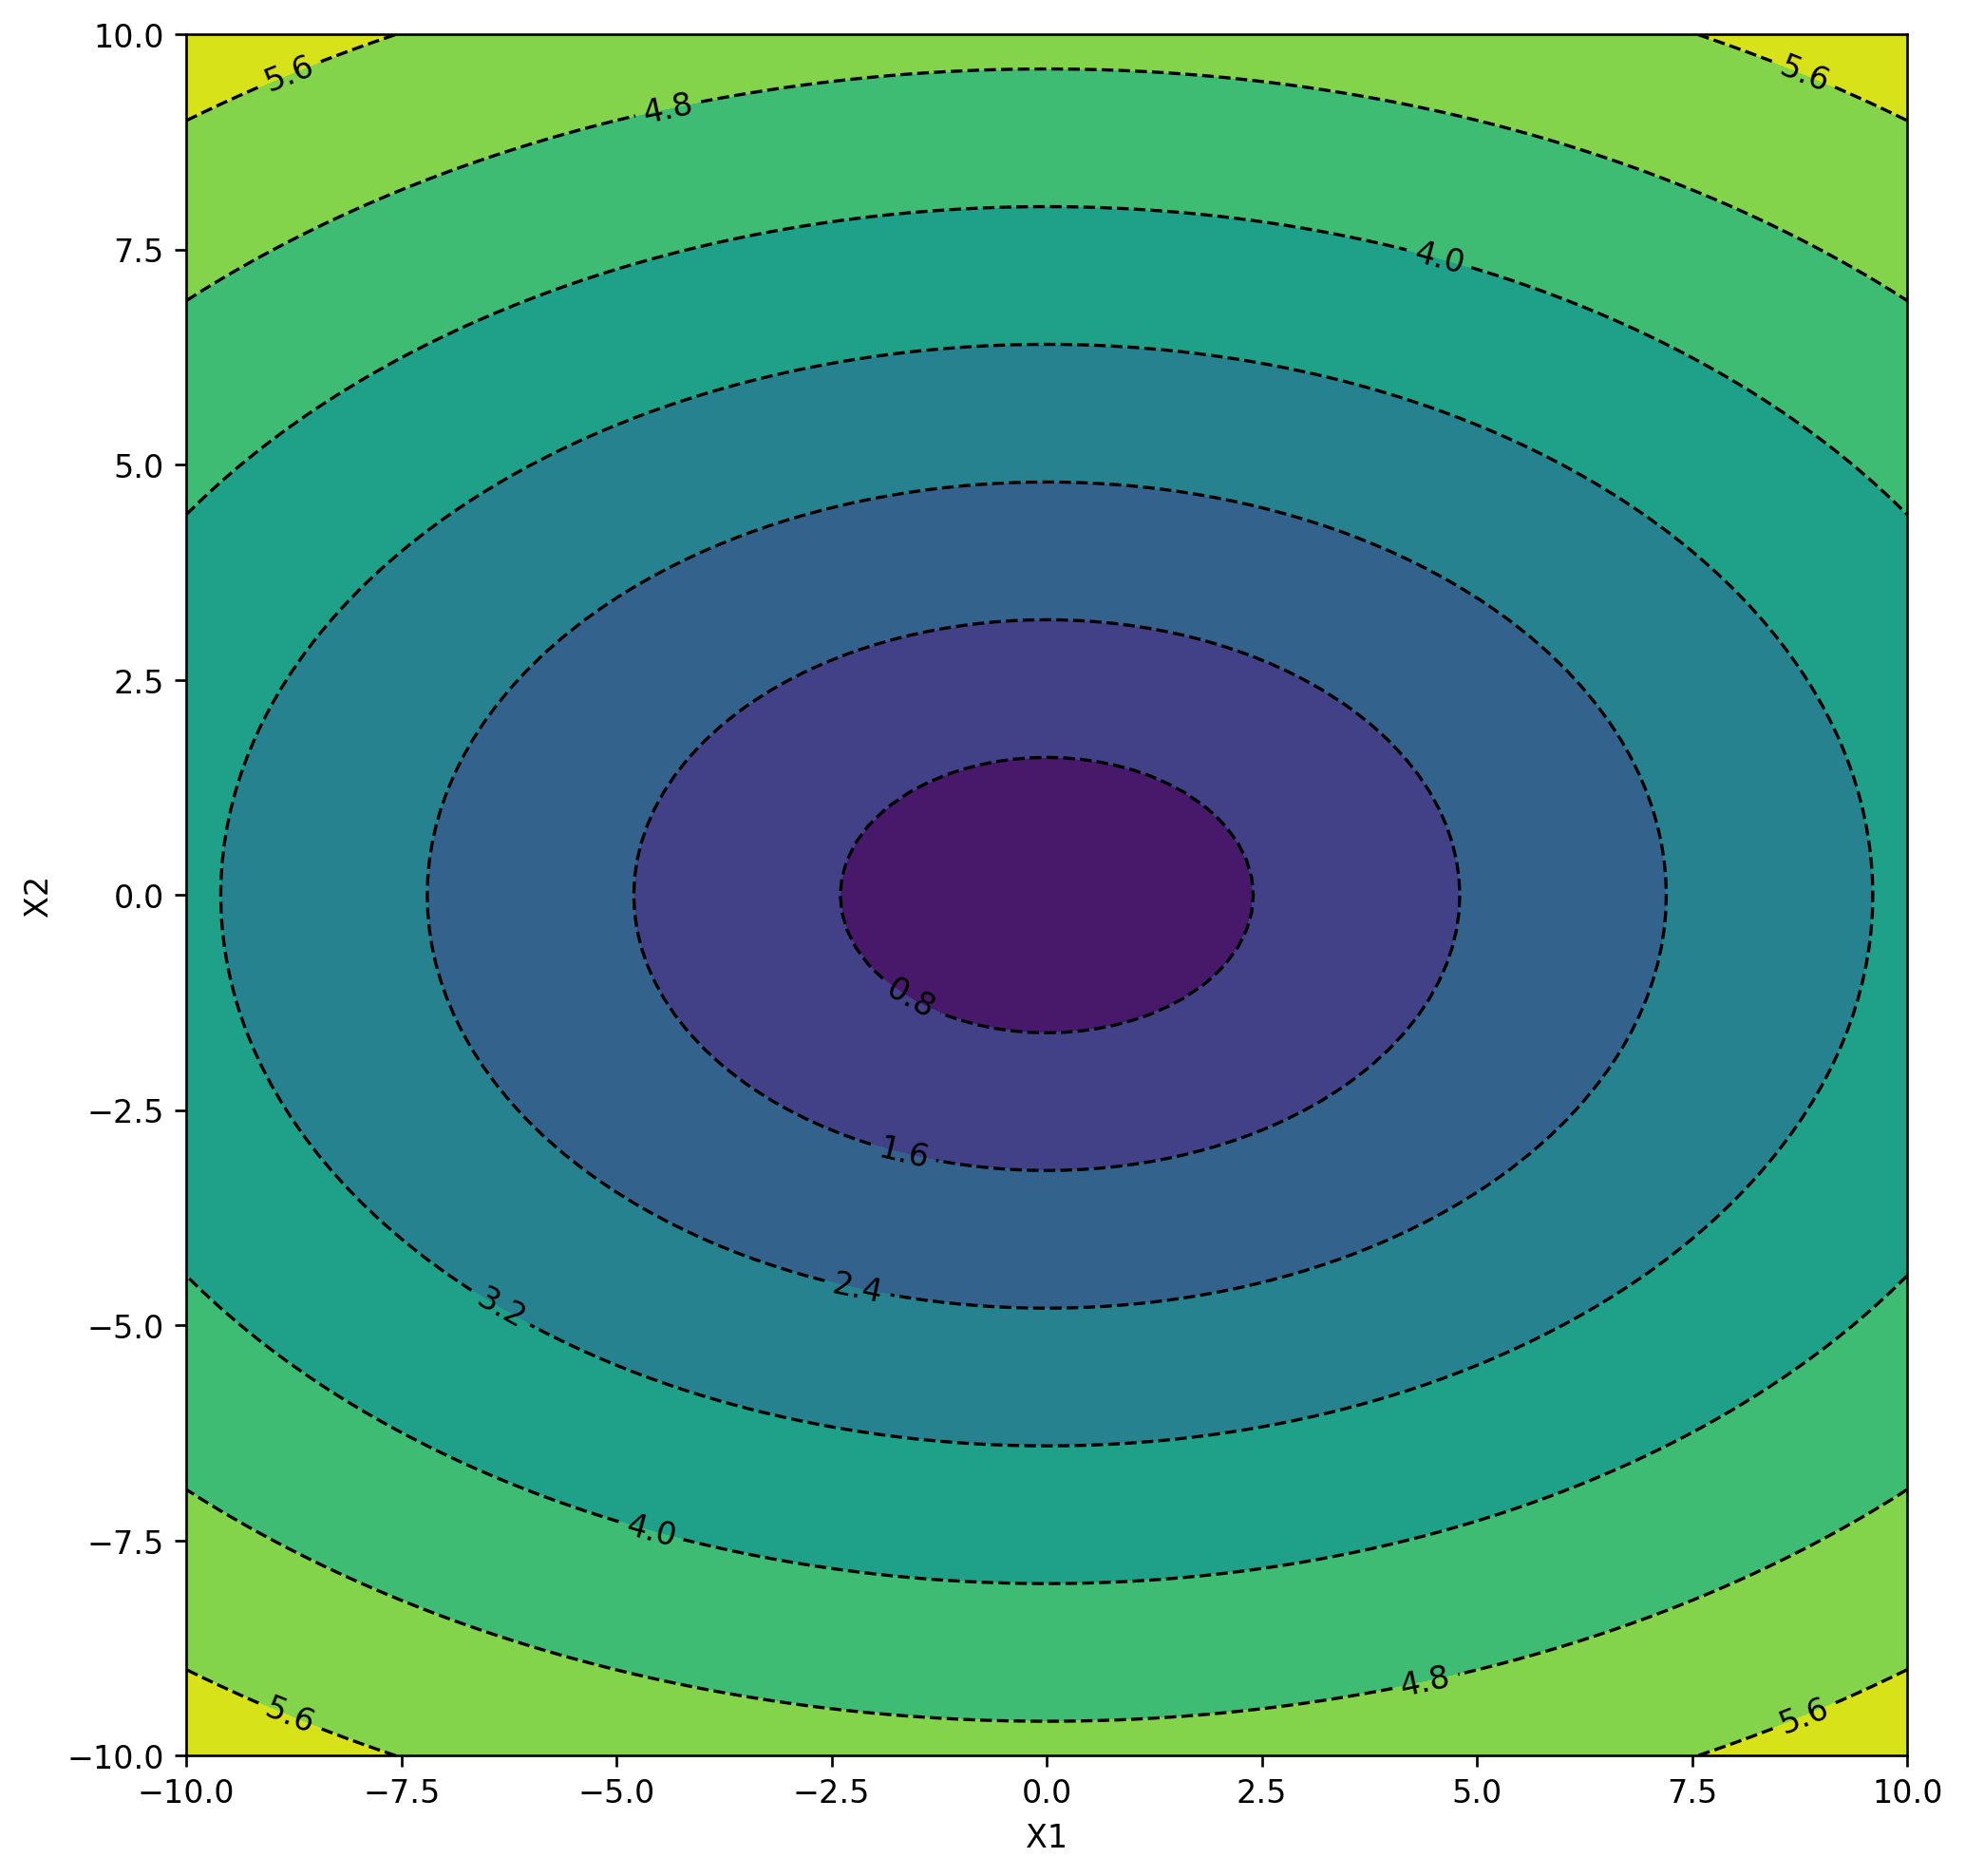

In [15]:
plt.figure(figsize=(10,10))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Real Data Application with Gradient Descent

In [18]:
data = pd.read_csv('Data/Advertising (1).csv')

In [19]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [20]:
# np.column_stack is very useful to concatenate two(or more) columns from the data frame into a matrix  
y = data['Sales']
X = np.column_stack((data['TV'], data['Radio']))
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
def gradient_mse(beta, x, y, alpha): # we defined a function that computes the gradient of the objective function
    n = len(y) # the number of observations
    y_hat = x.dot(beta).flatten()
    error = (y - y_hat)
    mse = (1.0 /n) * np.sum(np.square(error)) + alpha*np.sum(beta**2) #addid bit (penalty) is for ridge regression(?)
    gradient = -(2.0 /n) * error.dot(x) + 2*alpha*beta #Gradeint is the derivative of MSE in beta and in the error dimensions
    return gradient, mse

In [50]:
w = np.array((-60, -60)) # a very imprecise guess to initialize the coefficients
lr = .05 # the learning rate
tolerance = 1e-8 #if progress drops below this, stop
alpha = 0.01
 
old_w = []
mse = []
print(w)

[-60 -60]


In [51]:
# Perform Gradient Descent
iterations = 1
for i in range(500):
    gradient, mse_temp = gradient_mse(w, X_scaled, y, alpha)
    new_w = w - lr * gradient # here we update the coefficients in the direction of the negative gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Mean Squarred Error: %.4f" % (iterations, mse_temp))
        old_w.append(new_w)
        mse.append(mse_temp)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('The Gradient Descent Algorithm has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Mean Squarred Error: 1324.9953
Iteration: 20 - Mean Squarred Error: 318.0505
Iteration: 30 - Mean Squarred Error: 212.1025
Iteration: 40 - Mean Squarred Error: 200.9548
Iteration: 50 - Mean Squarred Error: 199.7819
Iteration: 60 - Mean Squarred Error: 199.6585
Iteration: 70 - Mean Squarred Error: 199.6455
Iteration: 80 - Mean Squarred Error: 199.6441
Iteration: 90 - Mean Squarred Error: 199.6440
Iteration: 100 - Mean Squarred Error: 199.6440
Iteration: 110 - Mean Squarred Error: 199.6440
Iteration: 120 - Mean Squarred Error: 199.6440
Iteration: 130 - Mean Squarred Error: 199.6440
Iteration: 140 - Mean Squarred Error: 199.6440
Iteration: 150 - Mean Squarred Error: 199.6440
Iteration: 160 - Mean Squarred Error: 199.6440
Iteration: 170 - Mean Squarred Error: 199.6440
Iteration: 180 - Mean Squarred Error: 199.6440
The Gradient Descent Algorithm has converged
w = [3.88100129 2.75859233]


In [52]:
all_ws = np.array(old_w)
 
# Just for visualization
mse.append(600)
mse.append(500)
mse.append(400)
mse.append(300)
mse.append(225)
 
levels = np.sort(np.array(mse))

In [53]:
levels

array([ 199.6439525 ,  199.6439525 ,  199.6439525 ,  199.6439525 ,
        199.6439525 ,  199.64395251,  199.64395252,  199.64395269,
        199.64395428,  199.64396941,  199.6441132 ,  199.64547964,
        199.65846575,  199.78188279,  200.95482556,  212.10246985,
        225.        ,  300.        ,  318.05052058,  400.        ,
        500.        ,  600.        , 1324.99529293])

In [54]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [55]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_mse(w_temp, X_scaled, y,alpha)[1]


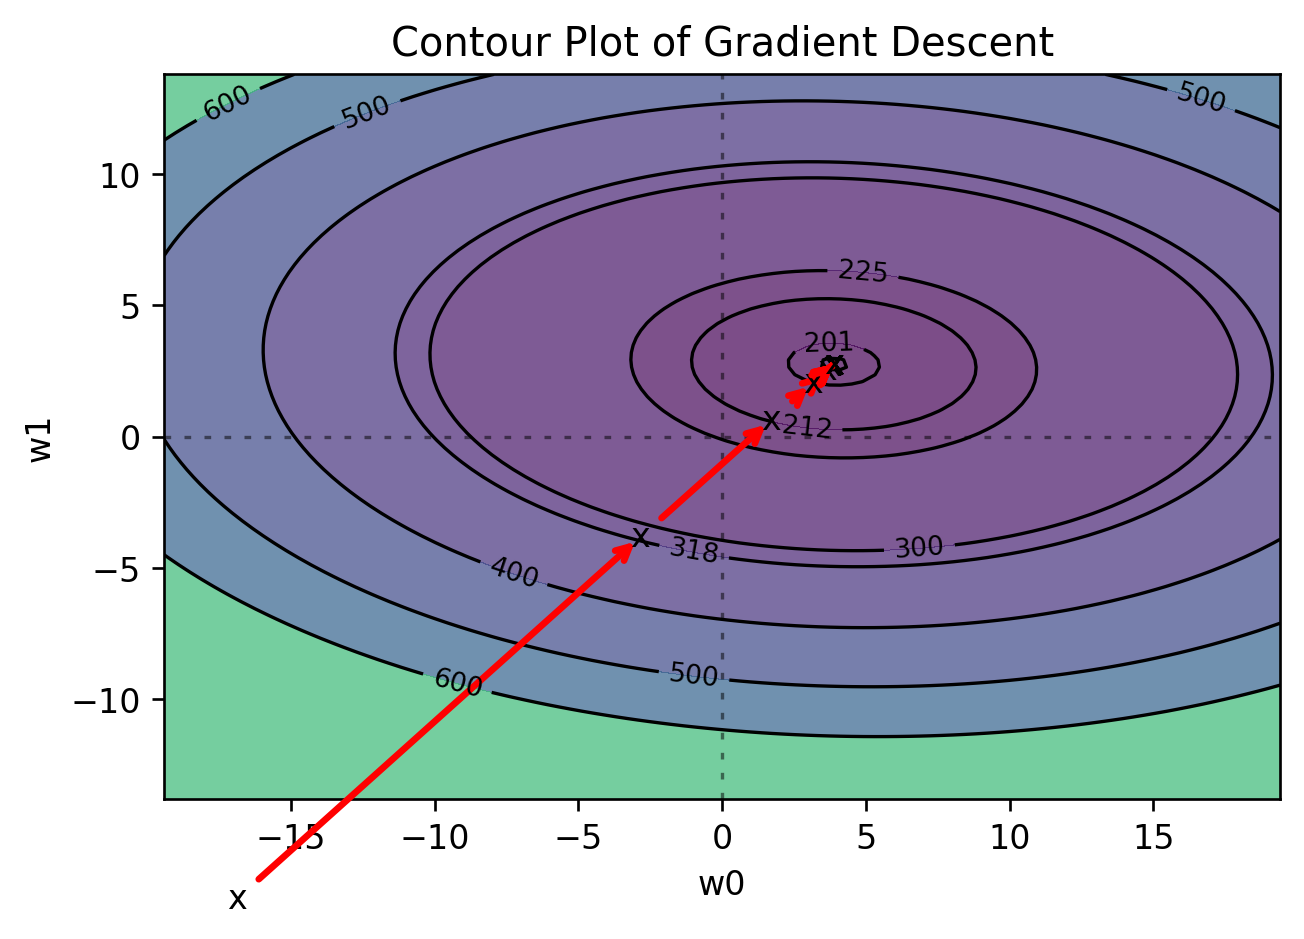

In [60]:
plt.figure()
plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('x', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
                 va='center', ha='center')
 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

In [ ]:
cars = pd.read_csv('drive/My Drive/Data Sets/cars.csv')

In [ ]:
cars

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [ ]:
x = cars[['WGT','ENG']].values
y = cars['MPG'].values

In [ ]:
xscaled = scaler.fit_transform(x)

In [ ]:
w = np.array((-60, -60)) # a very imprecise guess to initialize the coefficients
lr = .07 # the learning rate
tolerance = 1e-4
alpha = 0.01
 
old_w = []
mse = []

In [ ]:
# Perform Gradient Descent
iterations = 1
for i in range(1000):
    gradient, mse_temp = gradient_mse(w, xscaled, y, alpha)
    new_w = w - lr * gradient # here we update the coefficients in the direction of the negative gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Mean Squarred Error: %.4f" % (iterations, mse_temp))
        old_w.append(new_w)
        mse.append(mse_temp)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('The Gradient Descent Algorithm has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Mean Squarred Error: 568.2629
Iteration: 20 - Mean Squarred Error: 568.2629
The Gradient Descent Algorithm has converged
w = [-4.65232636 -1.91659787]
